**Malaria-Detection-CNN**

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.2.0-rc2


In [0]:
import numpy as np
import matplotlib.pyplot as plt

**Load data**

In [0]:
!wget https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip

--2020-04-26 22:49:29--  https://ceb.nlm.nih.gov/proj/malaria/cell_images.zip
Resolving ceb.nlm.nih.gov (ceb.nlm.nih.gov)... 130.14.52.15, 2607:f220:41e:7052::15
Connecting to ceb.nlm.nih.gov (ceb.nlm.nih.gov)|130.14.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 353452851 (337M) [application/zip]
Saving to: ‘cell_images.zip’

cell_images.zip     100%[===================>] 337.08M  39.6MB/s    in 7.9s    

2020-04-26 22:49:37 (42.5 MB/s) - ‘cell_images.zip’ saved [353452851/353452851]



In [0]:
!unzip cell_images.zip

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_91.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_1

**Configuration settings**

In [0]:
SEED = 101
# np.random.seed(SEED)

LABELS = ["Parasitized","Uninfected"]

# image size width x height
IMG_WIDTH = 32
IMG_HEIGHT = 32
TARGET_SIZE = [IMG_WIDTH, IMG_HEIGHT]

# RGB = 3 channels
CHANNELS = 3

BATCH_SIZE = 32

# path to image folders
DATA_PATH = "/content/cell_images"

In [0]:
# datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2) 
datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2, width_shift_range=0.1, height_shift_range=0.1, vertical_flip=True, horizontal_flip=True) 

In [0]:
train_generator = datagen.flow_from_directory(directory=DATA_PATH,
                                              target_size = TARGET_SIZE,
                                              classes=LABELS,
                                              class_mode='binary',
                                              batch_size=BATCH_SIZE,
                                              seed=SEED,
                                              subset='training'
                                            )

Found 22048 images belonging to 2 classes.


In [0]:
validation_generator = datagen.flow_from_directory(directory=DATA_PATH,
                                              target_size = TARGET_SIZE,
                                              classes=LABELS,
                                              class_mode='binary',
                                              batch_size=BATCH_SIZE,
                                              seed=SEED,
                                              subset='validation'
                                            )

Found 5510 images belonging to 2 classes.


In [0]:
(X_train, y_train) =  train_generator.next()

**Labels of the data**

In [0]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

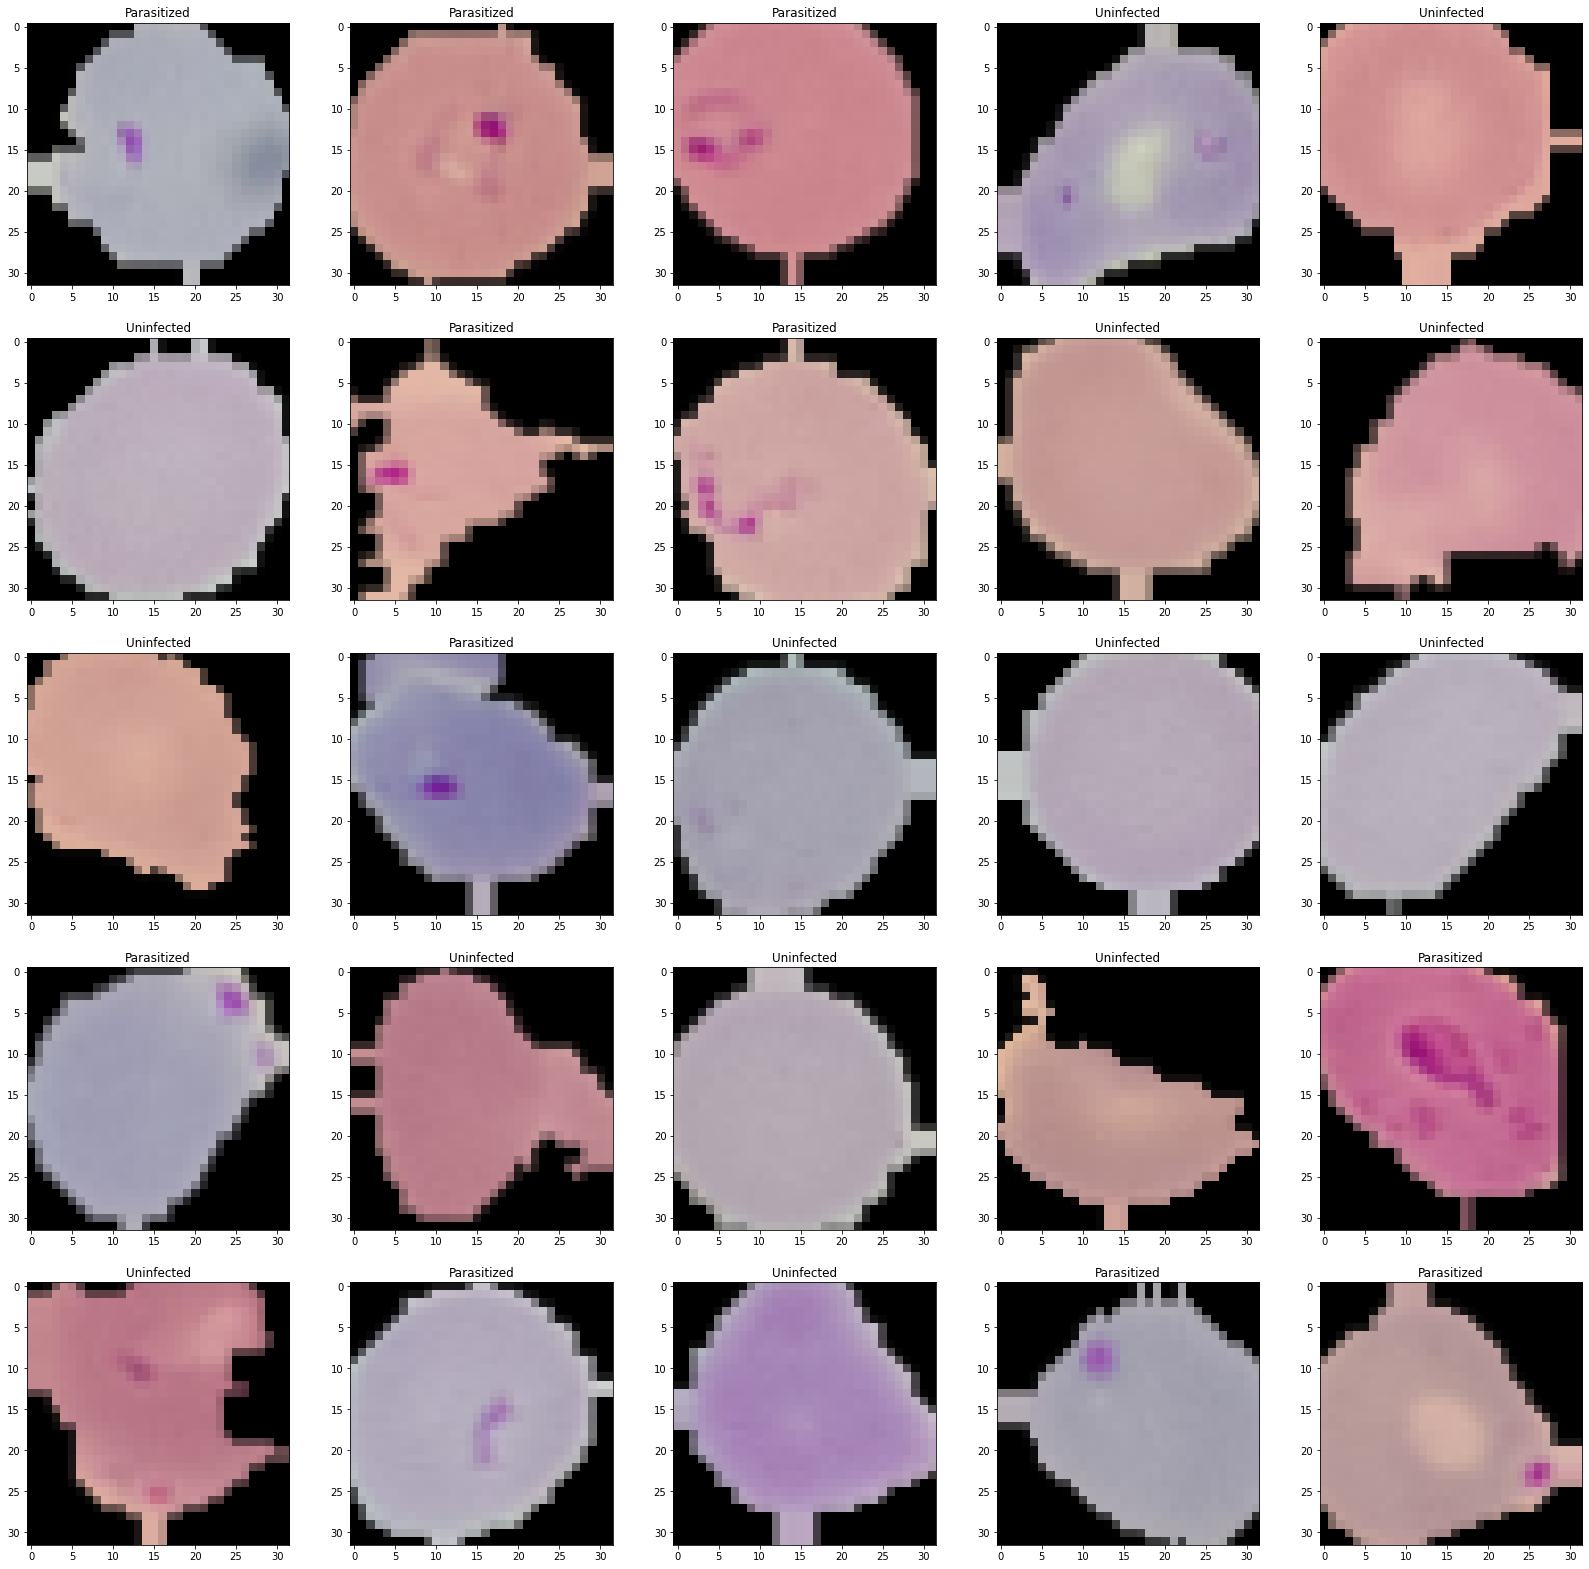

In [0]:
X_train, y_train = train_generator.next()
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i])
    if y_train[i] == 0:
        plt.title('Parasitized')
    else:
        plt.title('Uninfected')
    
plt.show()

**Model - Convolutional Neural Network** 

In [0]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape = (IMG_WIDTH, IMG_HEIGHT, CHANNELS), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_38 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_39 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_40 (Batc (None, 16, 16, 64)       

**Training**

In [0]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [0]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [0]:
history = model.fit_generator(generator=train_generator, 
                              steps_per_epoch=len(train_generator), 
                              epochs=20, 
                              verbose=1, 
                              validation_data=validation_generator, 
                              validation_steps=len(validation_generator),
                              callbacks=[early_stop])

Epoch 1/20
689/689 [==============================] - 303s 440ms/step - loss: 0.3854 - accuracy: 0.8361 - val_loss: 0.3026 - val_accuracy: 0.9089
Epoch 2/20
689/689 [==============================] - 303s 439ms/step - loss: 0.1765 - accuracy: 0.9434 - val_loss: 0.2457 - val_accuracy: 0.9212
Epoch 3/20
689/689 [==============================] - 303s 440ms/step - loss: 0.1584 - accuracy: 0.9471 - val_loss: 0.1676 - val_accuracy: 0.9423
Epoch 4/20
689/689 [==============================] - 302s 439ms/step - loss: 0.1556 - accuracy: 0.9503 - val_loss: 0.4833 - val_accuracy: 0.8412
Epoch 5/20
689/689 [==============================] - 303s 440ms/step - loss: 0.1470 - accuracy: 0.9538 - val_loss: 0.1533 - val_accuracy: 0.9488
Epoch 6/20
689/689 [==============================] - 304s 442ms/step - loss: 0.1459 - accuracy: 0.9538 - val_loss: 0.1856 - val_accuracy: 0.9387
Epoch 7/20
689/689 [==============================] - 303s 439ms/step - loss: 0.1368 - accuracy: 0.9558 - val_loss: 0.1537 -

**Model Performance**

In [0]:
def plot_performance(history=None):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    ylim_pad = [0.005, 0.005]
    plt.figure(figsize=(20, 5))

    # Plot training & validation Accuracy values

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]

    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    # Plot training & validation loss values

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]

    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n', fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    plt.show()

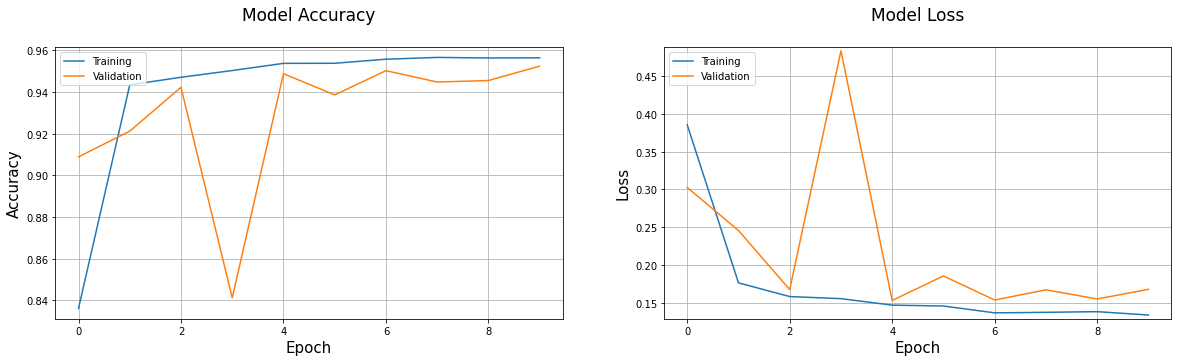

In [0]:
plot_performance(history=history)

**25 random test examples prediction results**

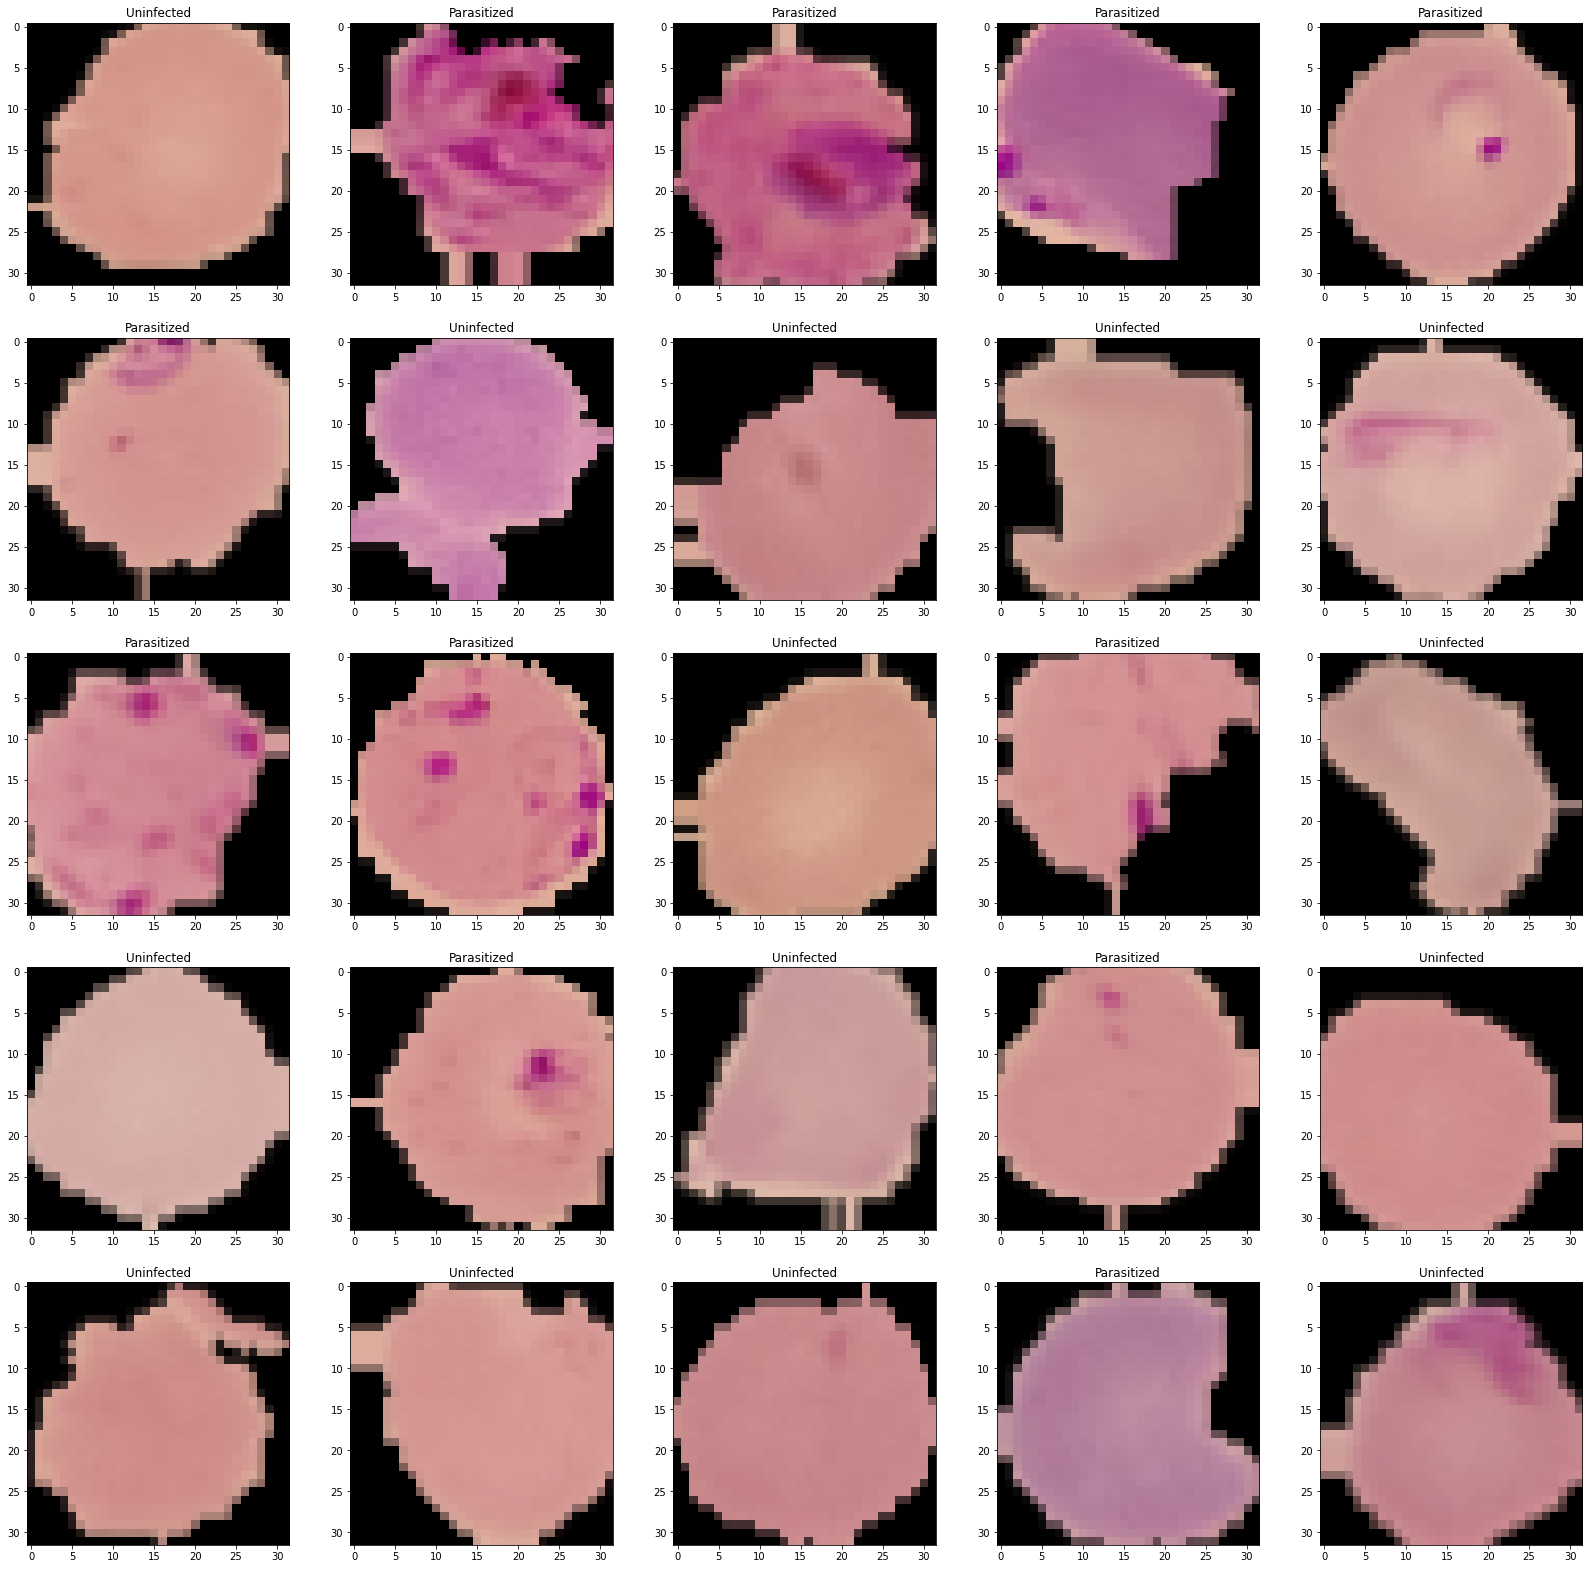

In [0]:
X_test, y_test = validation_generator.next()
fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
random_number = np.random.randint(0,X_test.shape[0]-26)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_test[i+random_number])
    plt.title(LABELS[int(y_test[i+random_number])])   
plt.show()

**Prediction to an unseen image**

In [0]:
from tensorflow.keras.preprocessing import image

'Uninfected'

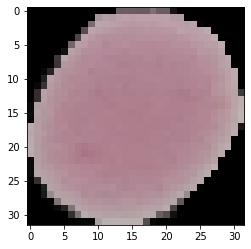

In [0]:
# img = image.load_img('/content/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png', target_size=(IMG_WIDTH, IMG_HEIGHT, CHANNELS))
img = image.load_img('/content/Uninfected-3.png', target_size=(IMG_WIDTH, IMG_HEIGHT, CHANNELS))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, IMG_WIDTH, IMG_HEIGHT, CHANNELS)
predictions = model.predict(img)
LABELS[int(predictions.flatten()[0].round())]